In [1]:
import csv
import os
import sys
import datetime
import sqlite3
import pandas as pd
import numpy
import matplotlib
import matplotlib.pyplot as plt
#from pyspark import SparkContext, SparkConf, HiveContext
from pyspark.sql import SparkSession
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)
import plotly


#from pyspark.conf import SparkConf
#SparkSession.builder.config(conf=SparkConf())


#spark = SparkSession.builder.master("local").appName("Word Count").config("spark.some.config.option", "some-value").getOrCreate()



In [2]:
spark = SparkSession.builder.appName('HackerNews').getOrCreate()

In [3]:
#data_schema = [StructField('by',StringType(),True)StructField('score',integerType(),True),StructField()]
#df=spark.read.option("header", "True").csv('hacker_news_full-000000000000.csv.gz')
#df=spark.read.csv('hacker_news_full-000000000000.csv.gz',header=True, sep='\t')
df = spark.read.csv('hacker_news_full-000000000000.csv.gz', header=True)

#You can read from multiple files by feeding in a list of files:
#fpath1 = "file1.csv.gz"
#fpath2 = "file2.csv.gz"
#DF = spark.read.csv([fpath1, fpath2] header=True)

#You can also create a "temporary view" allowing for SQL queries:
#fpath1 = "file1.csv.gz"
#fpath2 = "file2.csv.gz"
#DF = spark.read.csv([fpath1, fpath2] header=True)
#DF.createOrReplaceTempView("table_name")
#DFres = spark.sql("SELECT * FROM table_name)


#read a ton of files from s3...
#rdd = sc.textFile("s3://bucket/project1/20141201/logtype1/logtype1.*.gz")

In [4]:
#df.head(10)

In [5]:
#df.show()

In [6]:
#df.printSchema()
#this can be changed with I think .options(schema=sometihng) - see udemy section 8 #24 @ 9:40 python/spark jose


In [7]:
#df.columns

In [8]:
df.createOrReplaceTempView("HackerNews")
#time >1000000000 just filters out 6 bad entries --double chedk this is a good way to do it
results = spark.sql("SELECT time, timestamp, text FROM HackerNews WHERE text LIKE '% python %' AND time >1000000000 SORT BY time ASC")
results.show()

+----------+--------------------+--------------------+
|      time|           timestamp|                text|
+----------+--------------------+--------------------+
|1176147475|2007-04-09 19:37:...|if you're thinkin...|
|1176177583|2007-04-10 03:59:...|I feel horrible f...|
|1176725395|2007-04-16 12:09:...|defiantly there n...|
|1176847050|2007-04-17 21:57:...|"The longer you'v...|
|1186536605|2007-08-08 01:30:...|Can someone pleas...|
|1187322487|2007-08-17 03:48:...|Damn, I am workin...|
|1191276865|2007-10-01 22:14:...|well, as long as ...|
|1194842167|2007-11-12 04:36:...|They have to make...|
|1194949173|2007-11-13 10:19:...|You write it in J...|
|1196031067|2007-11-25 22:51:...|I totally agree. ...|
|1200936943|2008-01-21 17:35:...|Wow, that guy has...|
|1201176421|2008-01-24 12:07:...|imho give or take...|
|1204267561|2008-02-29 06:46:...|Paul, Do you guys...|
|1204670034|2008-03-04 22:33:...|I'm currently wor...|
|1204764167|2008-03-06 00:42:...|Does Python-like ...|
|120683393

In [9]:
python_results = results.select('time').collect()
python_results_timestamp = results.select('timestamp').collect()
#int(python_results[10][0])
#clean_python_results = [int(i[0]) for i in python_results]
#print(clean_python_results)

In [10]:
clean_python_results_timestamp = [i[0] for i in python_results_timestamp]
print(clean_python_results_timestamp)

['2007-04-09 19:37:55 UTC', '2007-04-10 03:59:43 UTC', '2007-04-16 12:09:55 UTC', '2007-04-17 21:57:30 UTC', '2007-08-08 01:30:05 UTC', '2007-08-17 03:48:07 UTC', '2007-10-01 22:14:25 UTC', '2007-11-12 04:36:07 UTC', '2007-11-13 10:19:33 UTC', '2007-11-25 22:51:07 UTC', '2008-01-21 17:35:43 UTC', '2008-01-24 12:07:01 UTC', '2008-02-29 06:46:01 UTC', '2008-03-04 22:33:54 UTC', '2008-03-06 00:42:47 UTC', '2008-03-29 23:38:52 UTC', '2008-04-08 03:49:33 UTC', '2008-05-15 19:10:10 UTC', '2008-05-19 18:29:25 UTC', '2008-05-22 17:06:58 UTC', '2008-05-23 18:54:23 UTC', '2008-06-03 21:11:24 UTC', '2008-06-05 23:14:13 UTC', '2008-06-10 13:42:31 UTC', '2008-06-19 03:21:05 UTC', '2008-06-23 15:11:26 UTC', '2008-06-24 07:43:21 UTC', '2008-06-24 10:58:27 UTC', '2008-06-25 17:01:12 UTC', '2008-06-26 21:31:42 UTC', '2008-06-30 11:21:26 UTC', '2008-07-11 06:13:40 UTC', '2008-07-14 17:14:36 UTC', '2008-07-29 14:45:20 UTC', '2008-08-08 07:08:08 UTC', '2008-08-13 04:09:44 UTC', '2008-08-17 16:41:33 UTC', 

In [12]:
count = numpy.arange(len(clean_python_results_timestamp))
Date_Data = matplotlib.dates.datestr2num(clean_python_results_timestamp)



/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



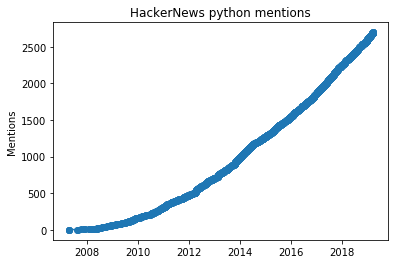

<Figure size 432x288 with 0 Axes>

In [13]:
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Mentions')
matplotlib.pyplot.title('HackerNews python mentions')
plt.show()
plt.savefig('HackerNews.png')
